# Creating data sets
In this section it will be shown how to handle both binned and unbinned data sets in the MinKit package. All the functions accept either NumPy ndarray objects or GPU arrays. The general idea is to load data to NumPy ndarray objects and, if using a GPU backend, send them to the device. Only GPU arrays returned by MinKit classes and functions are supported.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import minkit
import numpy as np

minkit.initialize()

## Unbinned data sets
In this case, the data set represents an array of values for each data parameter. These data sets are meant to be used in unbinned maximum likelihood fits.

In [2]:
numpy_data = np.random.normal(15, 1, 10000)

x = minkit.Parameter('x', bounds=(10, 20))

data = minkit.DataSet.from_array(numpy_data, x)

Similarly to binned data sets, if we have more than one data parameter we must use the constructor of the class. Values inside the data set have not been trimmed, that is, points outside the bounds defined by the data parameter are not removed, although it will be done if we decide to do certain operations on them, like a fit. The *DataSet* class allows to add, merge and create subsets.

Length of primordial sample: 10000
Length of merged data sample: 11000
Length of data with new data: 11000
Length of primordial data set (unchanged): 10000
Length of primordial data set after adding in-place: 11000


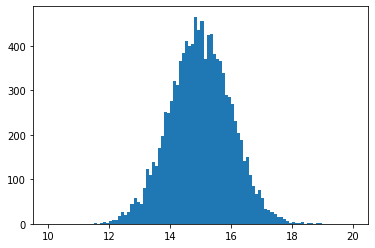

In [3]:
new_numpy_data = np.random.normal(15, 1, 1000)

print(f'Length of primordial sample: {len(data)}')

new_data = minkit.DataSet.from_array(new_numpy_data, x)

merged_data = minkit.DataSet.merge([data, new_data])

print(f'Length of merged data sample: {len(merged_data)}')

add_data = data.add(new_data)

print(f'Length of data with new data: {len(add_data)}')
print(f'Length of primordial data set (unchanged): {len(data)}')

data.add(new_data, inplace=True)

print(f'Length of primordial data set after adding in-place: {len(data)}')

values, edges = minkit.data_plotting_arrays(data, bins=100)

centers = 0.5 * (edges[1:] + edges[:-1])

plt.hist(centers, bins=edges, weights=values);

In unbinned data sets we can also define a set of weights to use.

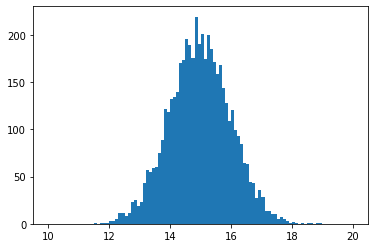

In [4]:
weights = np.random.uniform(0, 1, len(numpy_data))

data = minkit.DataSet.from_array(numpy_data, x, weights=weights)

values, edges = minkit.data_plotting_arrays(data, bins=100)

centers = 0.5 * (edges[1:] + edges[:-1])

plt.hist(centers, bins=edges, weights=values);

## Binned data sets
A binned data set is composed by two arrays, one defining the centers of the bins, and another the values in them. Let's create some data and then a binned data set with their contents.

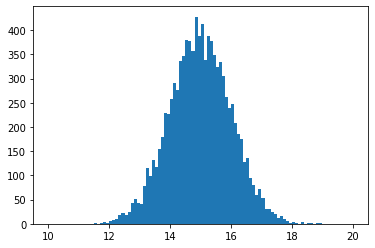

In [5]:
values, edges = np.histogram(numpy_data, bins=100, range=x.bounds)

data = minkit.BinnedDataSet.from_array(edges, x, values)

v, e = minkit.data_plotting_arrays(data)

c = 0.5 * (e[1:] + e[:-1])

plt.hist(c, bins=e, weights=v);

Note that we have created a data set from a single array. If we had more than one data parameter, we must use the constructor. The centers are accessed using the [] operator. Using *minkit.data_plotting_arrays* we can rebin the histogram, so we draw it with less bins.

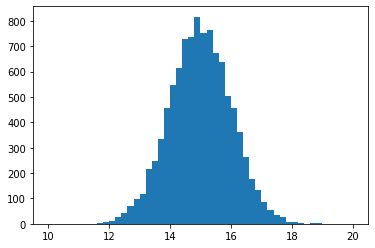

In [6]:
v, e = minkit.data_plotting_arrays(data, rebin=2)

c = 0.5 * (e[1:] + e[:-1])

plt.hist(c, bins=e, weights=v);

This way we have reduced the number of bins from 100 to 50.